# Handwritten numbers recognition with TensorFlow

This notebook aims to show the process of building and training a machine learning model with the **mnist** dataset: approximately 70.000 images of handwritten digits. At the end of this notebook, we will have a ML model that is able to classify a handwritten digit.

## Importing the required modules

For this project, we will use the following modules:
- **os**: system-specific variables and functions.
- **numpy**: linear algebra and array operations.
- **pandas**: data processing library.
- **tensorflow**: creating, training and evaluating the performance of a ML model.
- **matplotlib**: data visualization (plots, graphs, histograms etc.).

In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

print('Successfully imported modules')

Successfully imported modules


## Settings and hyperparameters definition

In [26]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth=200)

LEARNING_RATE = 0.03
EPOCHS = 50
BATCH_SIZE = 4000
VALIDATION_SPLIT = 0.2

print('Declared the constants')

Declared the constants


## Loading the dataset

The **mnist** database is already embedded into TensorFlow. Each image consists of a **28x28** matrix of integer values from the **[0, 255]** interval. The matrices represent the B/W version of the numbers, and each digit represents the color intensity.

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train[1732]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  20, 130, 215, 255, 210, 168, 117,   0,   0,   0,   0

## Number visualization

For a better understanding of how are the images built, we can take a look at the following figure.

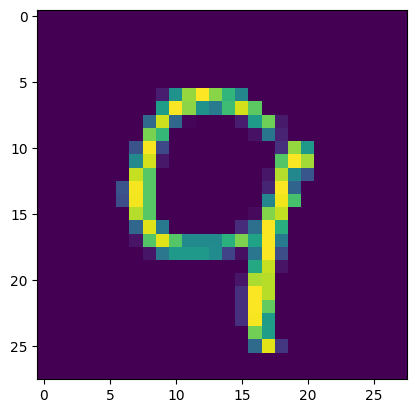

In [28]:
plt.figure()
plt.imshow(x_train[1732])

## Data normalization

The goal of the normalization process is to transform features to be on a similar scale. This improves the performance and stability of the model. In our case, we will scale the range of the values to a smaller one: **[0, 1]**.

In [29]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

print('Normalized the data')

Normalized the data


## Creating our model

Due to the fact that handwritten numbers identification is a multiclass classification problem, our architecture will look like this:
![Neural network architecture](../../assets/Architecture.png)

Our input image will always be a **28x28** matrix. In order to make our neural network understand the data provided, we will add a few hidden layers:
- In order for our neural network to understand the matrix, we will add a **flatten** layer. This layer will reduce the multidimensional input in a single dimensional one.
- A **dense** layer that implements the Rectified Linear Unit function (**ReLU**). The function is expressed as: $f(x) = max(x, 0)$. This implements the nonlinearity of our model.
- In order to prevent overfitting, we will add **dropout** to our neural net. Dropout is a regularization technique where a percentage of randomly selected nodes will be ignored during training.
- Another **dense** layer is added just before the output of the neural net, but this time with **softmax** activation. This type of function is used when there are more than 2 possible outputs.

In [30]:
def create_model(learning_rate: float) -> tf.keras.Model:
    ml_model = tf.keras.models.Sequential()

    ml_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    ml_model.add(tf.keras.layers.Dense(units=256, activation='relu'))

    ml_model.add(tf.keras.layers.Dropout(rate=0.4))

    ml_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    ml_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return ml_model

print('Defined the create model function')

Defined the create model function


## Training the model

In order to train our model, we will use the ```fit``` function with the following parameters:
- **x**: the feature.
- **y**: the label.
- **batch_size**: how many units of data we will use during one epoch.
- **epochs**: number of epochs.
- **shuffle**: whether to shuffle the training data before each epoch or not.
- **validation_split**: how much of the training set will be used for validation.

In [31]:
def train_model(ml_model, train_feature, train_label, epochs_count,
                batch_size=None, validation_split=0.1):
    history = ml_model.fit(
        x=train_feature,
        y=train_label,
        batch_size=batch_size,
        epochs=epochs_count,
        shuffle=True,
        validation_split=validation_split,
    )

    training_epochs = history.epoch
    training_hist = pd.DataFrame(history.history)

    return training_epochs, training_hist

print('Defined the train model function')

Defined the train model function


## Creating a model and training it on our dataset (Neural Network)

In [32]:
nn_model = create_model(LEARNING_RATE)

nn_epochs, nn_hist = train_model(
    nn_model,
    x_train_normalized,
    y_train,
    EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
)

Epoch 1/50
12/12 [==============================] - 1s 33ms/step - loss: 2.1107 - accuracy: 0.5404 - val_loss: 0.4914 - val_accuracy: 0.8681
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 0.5612 - accuracy: 0.8219 - val_loss: 0.2890 - val_accuracy: 0.9176
Epoch 3/50
12/12 [==============================] - 0s 29ms/step - loss: 0.3873 - accuracy: 0.8837 - val_loss: 0.2280 - val_accuracy: 0.9342
Epoch 4/50
12/12 [==============================] - 0s 25ms/step - loss: 0.3182 - accuracy: 0.9060 - val_loss: 0.1931 - val_accuracy: 0.9453
Epoch 5/50
12/12 [==============================] - 0s 24ms/step - loss: 0.2675 - accuracy: 0.9194 - val_loss: 0.1712 - val_accuracy: 0.9508
Epoch 6/50
12/12 [==============================] - 0s 32ms/step - loss: 0.2403 - accuracy: 0.9279 - val_loss: 0.1579 - val_accuracy: 0.9547
Epoch 7/50
12/12 [==============================] - 0s 28ms/step - loss: 0.2173 - accuracy: 0.9340 - val_loss: 0.1530 - val_accuracy: 0.9565
Epoch 8/50
12

## Model performance visualization (Neural Network)

In [33]:
def plot_the_accuracy_curve(training_epochs, training_hist, list_of_metrics, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Value')

    for metric in list_of_metrics:
        x = training_hist[metric]
        plt.plot(training_epochs[1:], x[1:], label=metric)

    plt.legend()
    plt.show()

print('Defined the plotting function')

Defined the plotting function


## Plotting the accuracy of the models

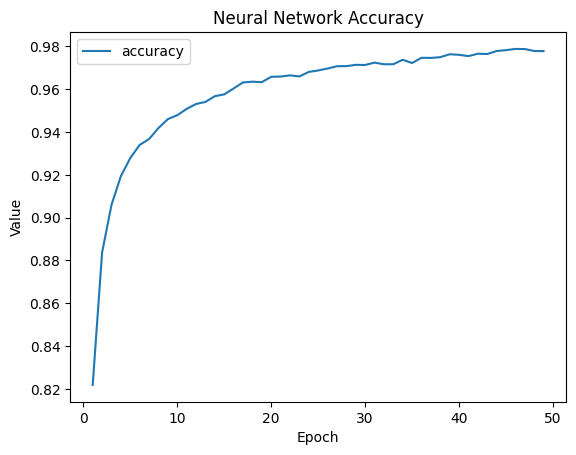

In [34]:
list_of_metrics_to_plot = ['accuracy']

plot_the_accuracy_curve(nn_epochs, nn_hist, list_of_metrics_to_plot, 'Neural Network Accuracy')

## Evaluating our models with the test dataset

In [35]:
_ = nn_model.evaluate(
    x=x_test_normalized,
    y=y_test,
    batch_size=BATCH_SIZE
)

3/3 [==============================] - 0s 9ms/step - loss: 0.1199 - accuracy: 0.9743


## Saving our model (Neural Network)

In [36]:
save_path = os.path.abspath(os.path.join(os.getcwd(), '../..', 'model'))
nn_model.save(save_path)

print('Saved the model.')

INFO:tensorflow:Assets written to: C:\Users\sbalmus\PycharmProjects\ML_Learning\My_projects\handwritten_numbers_classifier\model\assets


INFO:tensorflow:Assets written to: C:\Users\sbalmus\PycharmProjects\ML_Learning\My_projects\handwritten_numbers_classifier\model\assets


Saved the model.
